# Retrieving data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
display(df.head())
df.info()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Data cleaning

In [5]:
#df.info()

def col_names_std(df):
    import pandas as pd
    import numpy as np
    df.columns = [df.columns[i].lower().replace(' ','_') for i in range(len(df.columns))]
    return df

#df.info()
df=col_names_std(df)
#df['state'].unique()
#df = df.drop_duplicates()
#df.info()

import datetime
from datetime import date

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
#df['effective_to_date']

##### (There is not much data cleaning to do)

# EDA

In [6]:
summary = df.describe().T #returns a dataframe with which I can work, and '.T' transposes it
summary['iqr'] = summary['75%']-summary['25%'] #addition of the iqr -inter quantile range- column
summary = summary.apply(lambda x: round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38,4967.92
income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00,62320.00
monthly_premium_auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00,41.00
months_since_last_claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00,17.00
months_since_policy_inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00,47.00
number_of_open_complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00
number_of_policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00,3.00
total_claim_amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24,275.26


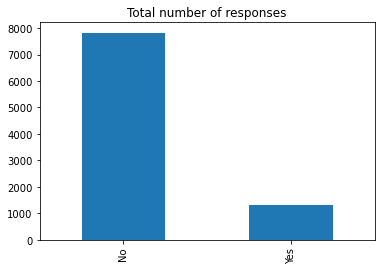

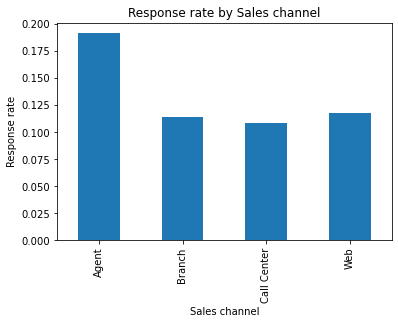

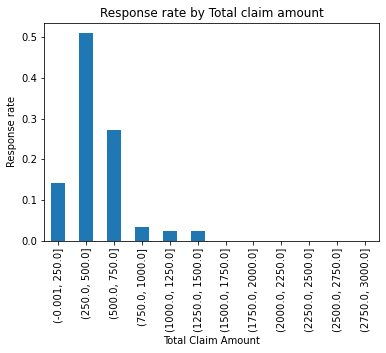

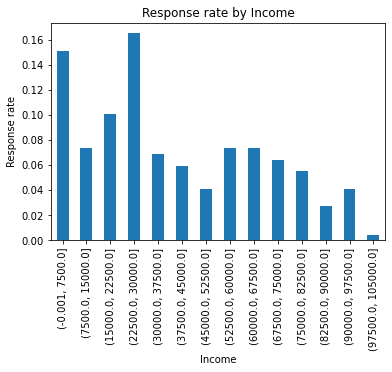

In [7]:
#- Show a plot of the total number of responses.
plot1 = df['response'].value_counts().plot(kind='bar', title="Total number of responses")
                                    #figsize=(8,8),
                                    #title="Total number of responses")
plt.show()

#Convert to boolean
df['response_bool']=df.response.replace(('Yes', 'No'), (1, 0))
#df.groupby(['sales_channel', 'response'], as_index=True)['sales_channel'].count()
                                                                #.reset_index()#.plot(kind='bar')
df_rr_by_sales = pd.crosstab(df['sales_channel'], df['response_bool']).apply(lambda x: x/x.sum(), axis=1)

#- Show a plot of the response rate by the sales channel.
plot2=df_rr_by_sales[1].plot(kind='bar', title="Response rate by Sales channel", 
                       xlabel='Sales channel', ylabel='Response rate')

plt.show()

#- Show a plot of the response rate by the total claim amount.
#I want bins of total claim amount in x-axis, and response rate in y-axis

bins = np.arange(0,df['total_claim_amount'].max() + 250, 250)
df['total_claim_binned'] = pd.cut(df['total_claim_amount'], bins, include_lowest=True)
df_rr_by_tot_claim = pd.crosstab(df['response'], df['total_claim_binned']).apply(lambda x: x/x.sum(), axis=1).T

#display(df_rr_by_tot_claim)

plot3=df_rr_by_tot_claim['Yes'].plot(kind='bar', title="Response rate by Total claim amount", 
                       xlabel='Total Claim Amount', ylabel='Response rate')

plt.show()

#- Show a plot of the response rate by income.
bins4 = np.arange(0,df['income'].max() + 7500, 7500)

df['income_binned'] = pd.cut(df['income'], bins4, include_lowest=True)

df_rr_by_income = pd.crosstab(df['response'], df['income_binned']).apply(lambda x: x/x.sum(), axis=1).T

#display(df_rr_by_income)

plot4=df_rr_by_income['Yes'].plot(kind='bar', title="Response rate by Income", 
                       xlabel='Income', ylabel='Response rate')

plt.show()

# Pre-processing

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

df=df.drop(['total_claim_binned','income_binned', 'response_bool'], axis=1)

In [9]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Separating numerical from categorical values

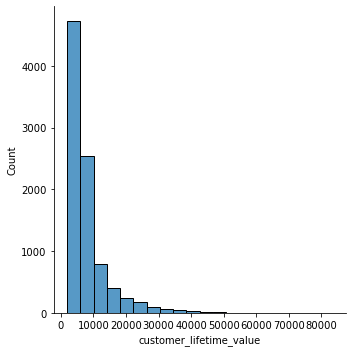

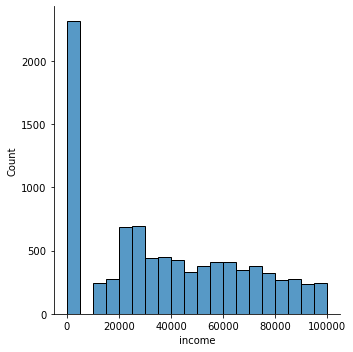

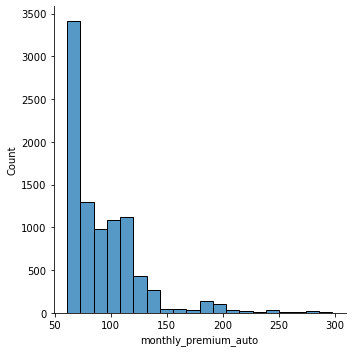

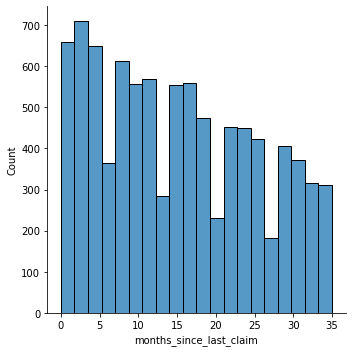

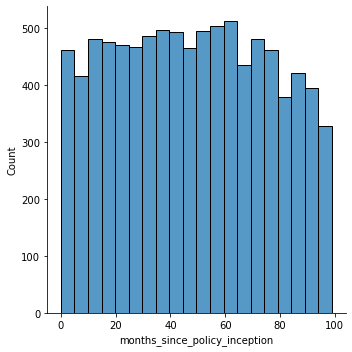

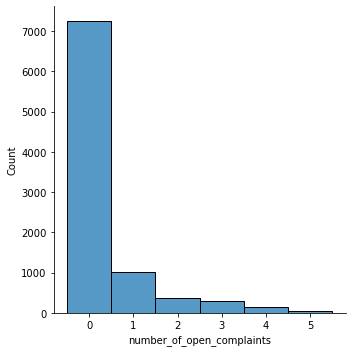

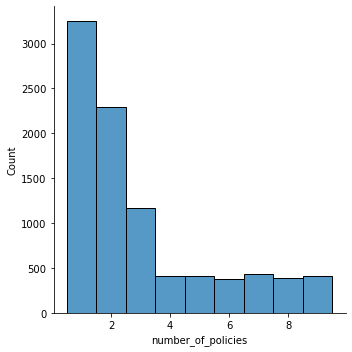

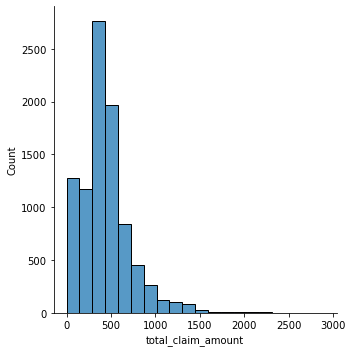

In [10]:
categoricals=df.select_dtypes(include=['object', 'datetime64'])
#NOTE: I am excluding the datetime objects
#display(categoricals)

numerical=df.select_dtypes(include='number')#.apply(lambda x: round(x,2)) # a lambda just to round it pretty
#NOTE: I am excluding the boolean response
#display(numerical)

continuous=['customer_lifetime_value', 'income', 'monthly_premium_auto', 
            'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
discrete=['number_of_open_complaints', 'number_of_policies']

for column in numerical.columns:
    if column in continuous:
        sns.displot(numerical, x=column, bins=20)
    else:
        sns.displot(numerical, x=column, discrete=True)

## Check the correlations

### Correlation matrix

In [11]:
corr_data = df.select_dtypes([np.number])#here, I just want to keep my numerical values
#actually, we don't need to separate the numerical data here, since Python ignores cathegorical data
#when it calculates correlations

correlations_matrix = corr_data.corr(method='spearman')  # method='spearman'
display(correlations_matrix)

correlations_matrix[(correlations_matrix['total_claim_amount']>.2)|(correlations_matrix['total_claim_amount']<-.2)]['total_claim_amount'] 
#filter to help me see the info I have

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


customer_lifetime_value    0.210598
income                    -0.401598
monthly_premium_auto       0.522261
total_claim_amount         1.000000
Name: total_claim_amount, dtype: float64

### Heatmap

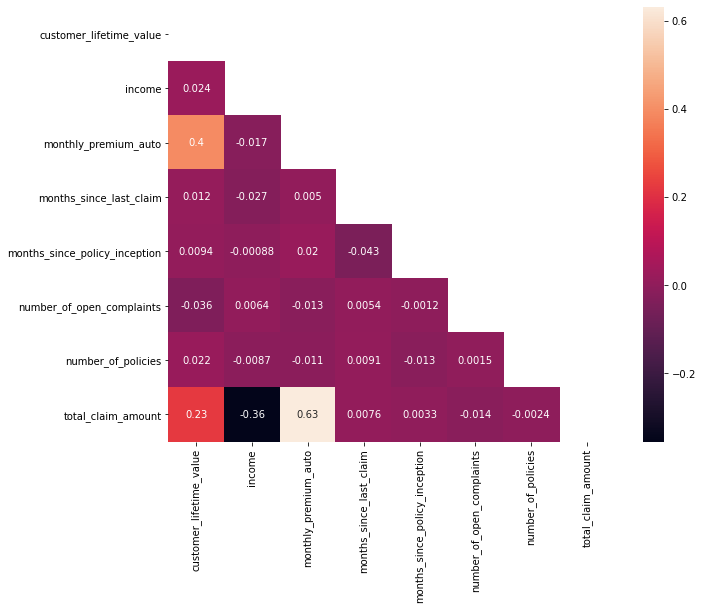

In [12]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

# Normalizations

## BoxCox transformation (numericals, total claim amount excluded)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154
...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588905
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.792951
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263726
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,44.225147


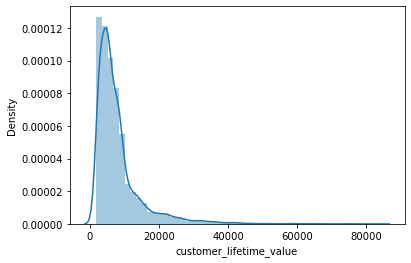

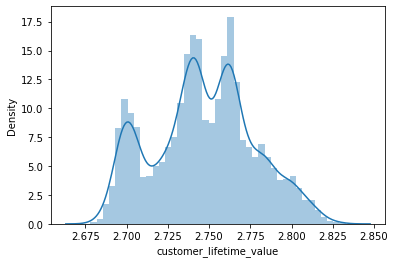

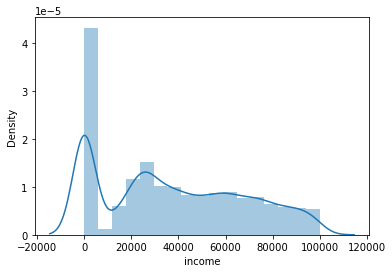

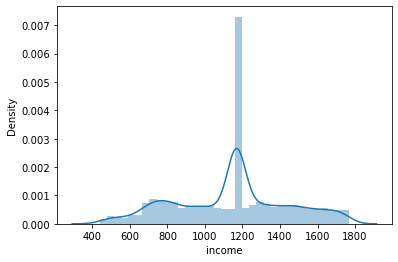

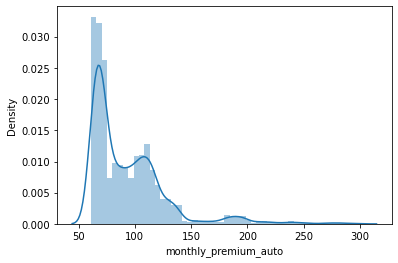

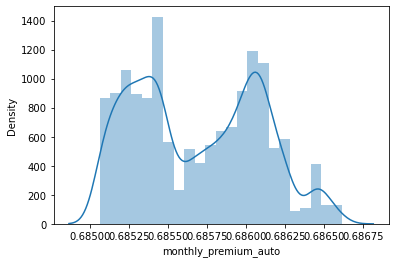

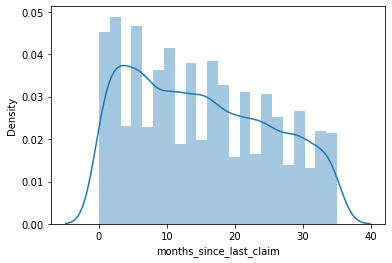

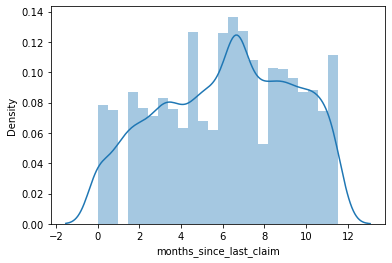

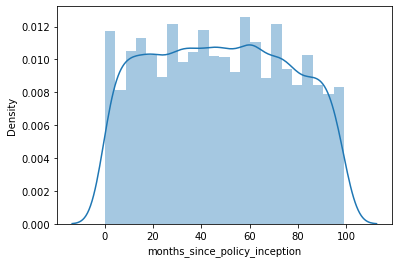

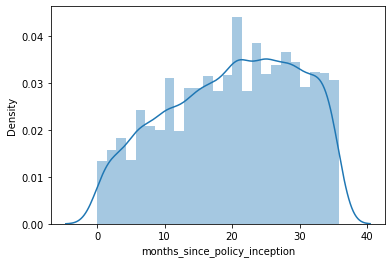

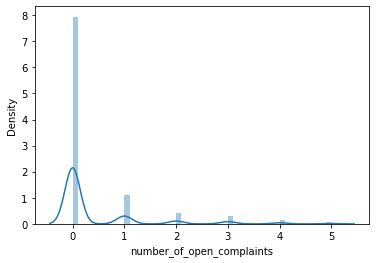

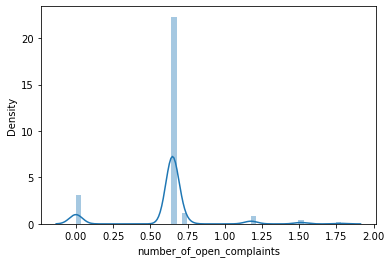

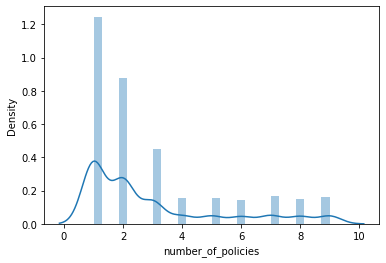

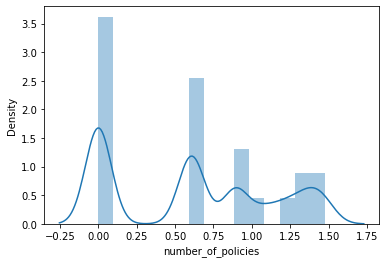

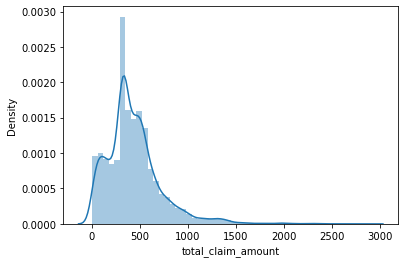

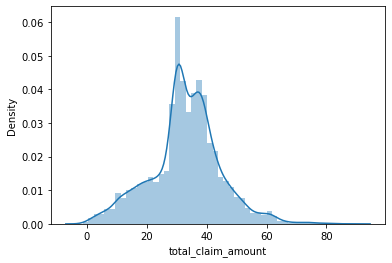

In [13]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols} #it will first generate this dictionary
    for column in numeric_cols:
        #In this case, I need the confidence interval data
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) #boxcox does not work with negatives
        df[column] = df[column].fillna(df[column].mean()) #I fill the nan's with the mean
        transformed_data, ci = stats.boxcox(df[column]) 
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

num_copy = numerical.copy() #It is important to do it this way with the .copy method.

trans, _ci = boxcox_transform(num_copy)
display(trans)

for col in trans:
    sns.distplot(numerical[col])
    plt.show()
    sns.distplot(trans[col])
    plt.show()

## XY split (for StandardScaler)

In [20]:
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)#np.number includes int and float
X_cat = X.select_dtypes(include = np.object)

In [45]:
from sklearn.preprocessing import StandardScaler

import pickle

# using standard scaler
transformer = StandardScaler() # StandardScaler and MinMax scaler works row wise,
# so make sure you do the train-test split first (optional)
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized.shape
x_standardized=pd.DataFrame(x_standardized, index=None, columns=X_num.columns)
display(x_standardized)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


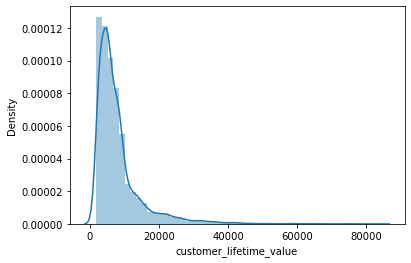

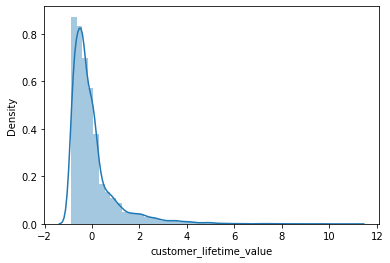

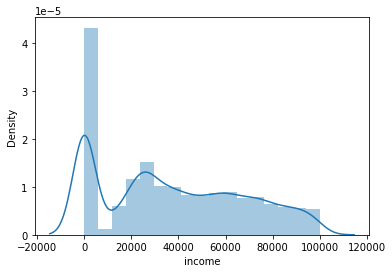

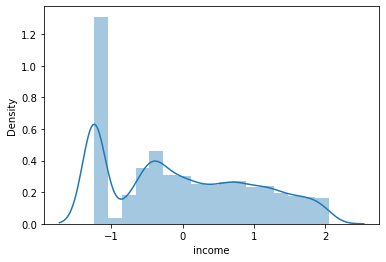

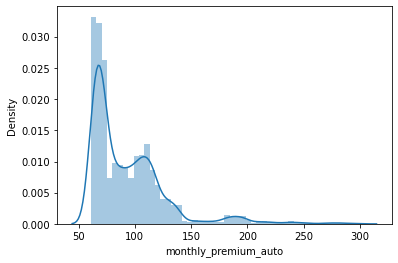

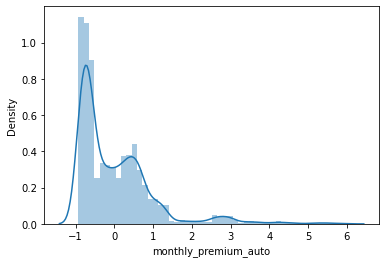

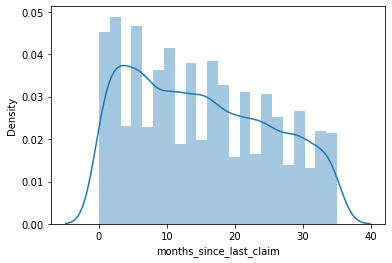

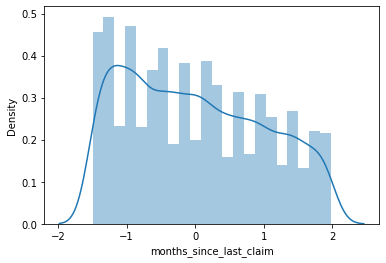

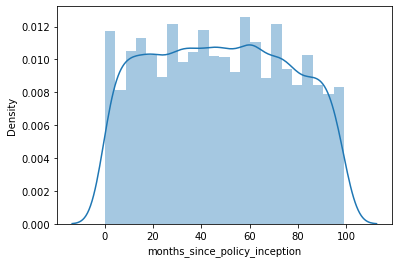

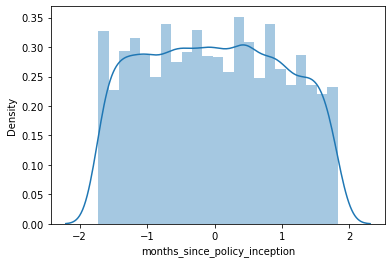

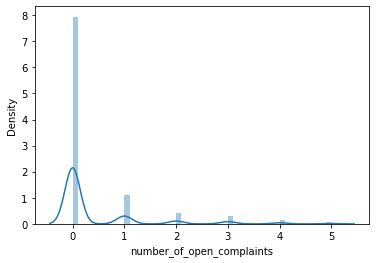

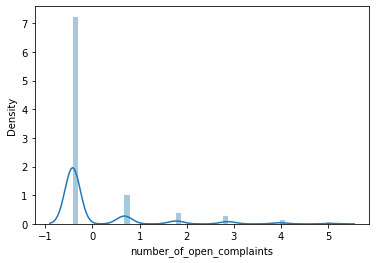

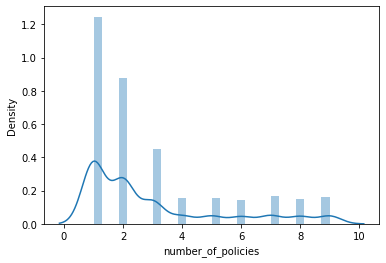

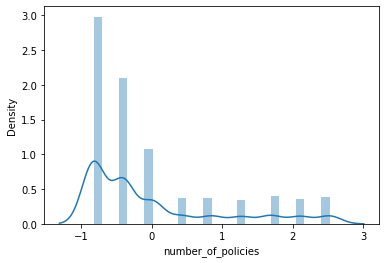

In [48]:
for col in X_num:
    sns.distplot(X_num[col])
    plt.show()
    sns.distplot(x_standardized[col])
    plt.show()

## Removing outliers

In [57]:
df=x_standardized

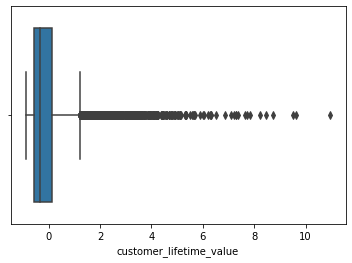

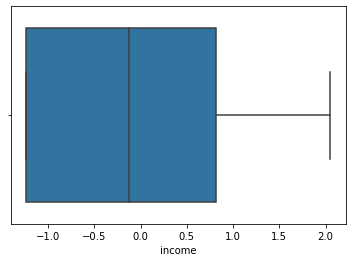

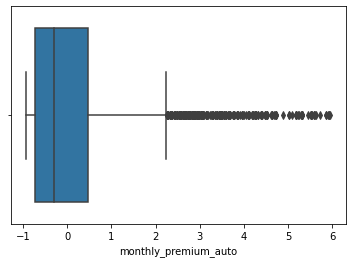

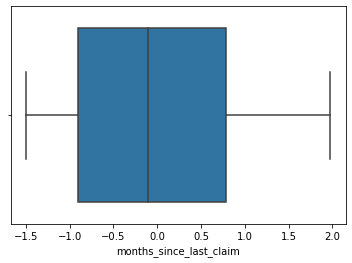

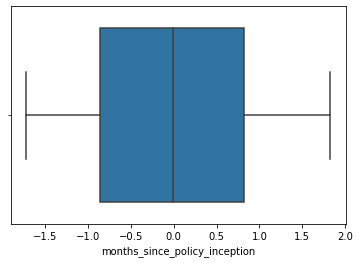

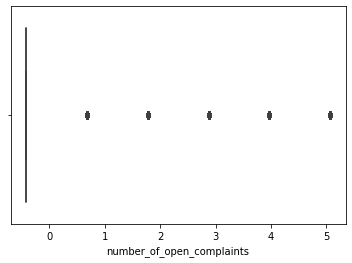

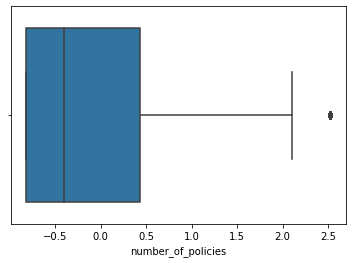

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [58]:
for row in df:
    sns.boxplot(x=df[row])#, whis=10) # whis is the parameter to choose your threshold, standard is 1.5
    plt.show()
    
df

In [62]:
# the stantard threshold to consider is by adding (upper) or subtracting (lower) 1.5 x IQR in absence of
# any other indication of outlier for this dataset 
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [79]:
df1 = df.copy()

df1 = remove_outliers(df1, threshold=2, in_columns=['customer_lifetime_value']) # we don't want to reduce our data too much,
## but we can play with the parameters to see,
## so after a better analysis we can choose which columns to drop outliers or not
df1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9128,-0.568298,0.332594,0.313337,0.089648,0.356051,-0.422250,-0.822648
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


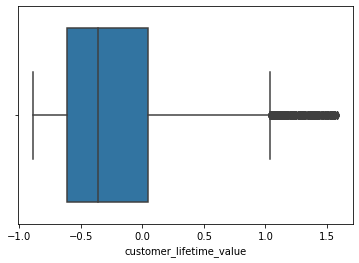

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9128,-0.568298,0.332594,0.313337,0.089648,0.356051,-0.422250,-0.822648
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


In [80]:
sns.boxplot(x=df1['customer_lifetime_value'])
plt.show()
df1
#sns.boxplot(x=df1['total_claim_amount'])
#plt.show()

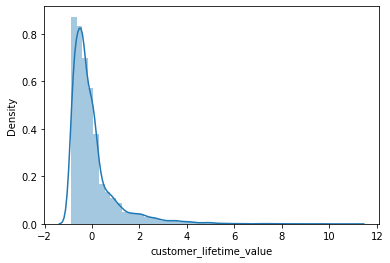

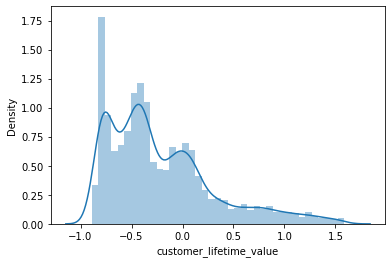

In [81]:
sns.distplot(x_standardized['customer_lifetime_value'])
plt.show()
sns.distplot(df1['customer_lifetime_value'])
plt.show()